In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, validation_curve
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [24]:
df = pd.read_csv("bismillah.csv")

## One-Hot Encoder

In [25]:
from sklearn.preprocessing import OneHotEncoder

df = pd.concat([df, pd.get_dummies(df['kota'], prefix='kota')], axis=1)
df = pd.concat([df, pd.get_dummies(df['kecamatan'], prefix='kecamatan')], axis=1)
df.drop(['kota', 'kecamatan'], axis=1, inplace=True)
df.head()

,kamar_tidur,kamar_mandi,luas,harga,kota_Banjar,kota_Banjarbaru,kota_Banjarmasin,kota_Barito,kota_Kalimantan,kecamatan_Alalak,...,kecamatan_Banjarmasin Tengah,kecamatan_Banjarmasin Timur,kecamatan_Banjarmasin Utara,kecamatan_Gambut,kecamatan_Kertak Hanyar,kecamatan_Landasan Ulin,kecamatan_Liang Anggang,kecamatan_Martapura Kota,kecamatan_Sei/Sungai Tabuk,kecamatan_Tatah Makmur
0,2,2,70,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2,1,60,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2,1,120,550000000,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,3,2,100,555000000,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2,1,45,400000000,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


## Split Train Test

In [26]:
X = df.drop(columns=['harga'])
y = df['harga']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, 
                                                    random_state = 137)

## Standard Scaler

In [28]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['kamar_mandi', 'kamar_tidur', 'luas']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])

## Validation Curves

### n_estimators

In [29]:
param_range = list(range(0, 100))

train_scores, test_scores = validation_curve(
                          GradientBoostingRegressor(),
                          X = X_train, y = y_train,
                          param_name = 'n_estimators',
                          param_range = param_range, cv = 3,
                          scoring="neg_mean_squared_error", n_jobs=-1)

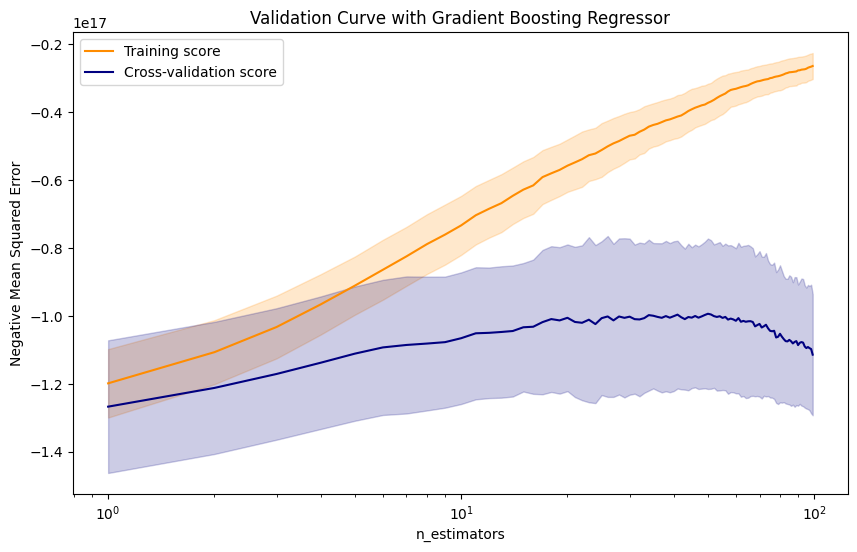

In [30]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))

plt.semilogx(param_range, 
             train_scores_mean, 
             label="Training score", 
             color="darkorange")
plt.semilogx(param_range, 
             test_scores_mean, 
             label="Cross-validation score", 
             color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, 
                 color="darkorange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, 
                 color="navy")

plt.xlabel("n_estimators")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve with Gradient Boosting Regressor")
plt.legend(loc="best")
plt.show()

### max_depth

In [31]:
param_range = list(range(1, 32, 1))

train_scores, test_scores = validation_curve(
                          GradientBoostingRegressor(),
                          X = X_train, y = y_train,
                          param_name = 'max_depth',
                          param_range = param_range, cv = 3,
                          scoring="neg_mean_squared_error", n_jobs=-1)

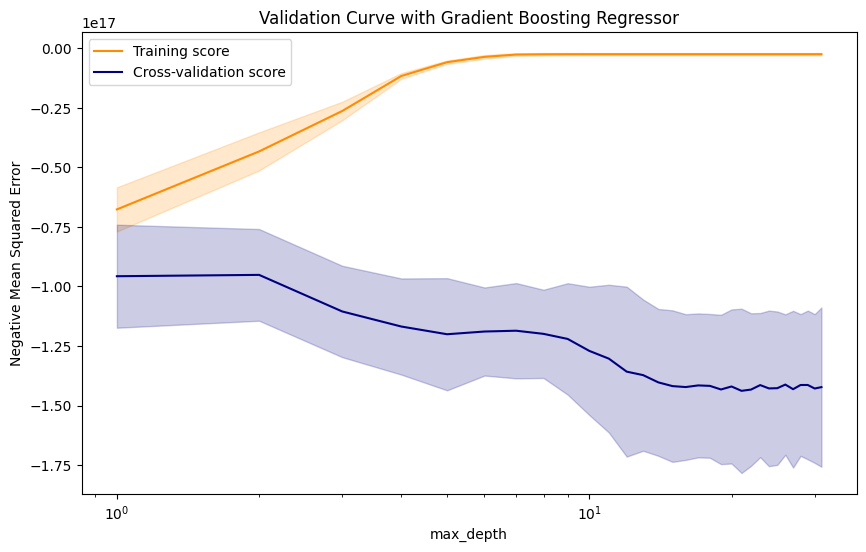

In [32]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))

plt.semilogx(param_range, 
             train_scores_mean, 
             label="Training score", 
             color="darkorange")
plt.semilogx(param_range, 
             test_scores_mean, 
             label="Cross-validation score", 
             color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, 
                 color="darkorange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, 
                 color="navy")

plt.xlabel("max_depth")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve with Gradient Boosting Regressor")
plt.legend(loc="best")
plt.show()

### min_samples_split

In [33]:
param_range = np.linspace(0.1, 1.0, 10, endpoint=True)

train_scores, test_scores = validation_curve(
                          GradientBoostingRegressor(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_split',
                          param_range = param_range, cv = 3,
                          scoring="neg_mean_squared_error", n_jobs=-1)

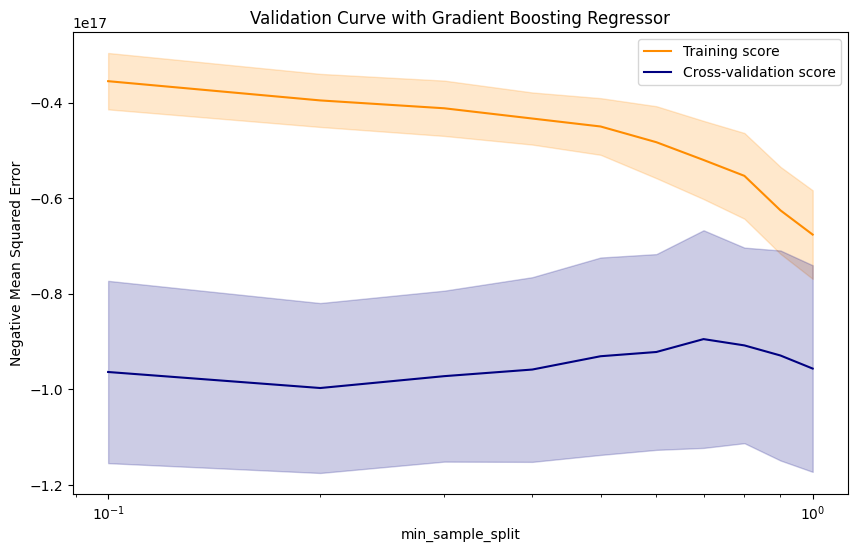

In [34]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))

plt.semilogx(param_range, 
             train_scores_mean, 
             label="Training score", 
             color="darkorange")
plt.semilogx(param_range, 
             test_scores_mean, 
             label="Cross-validation score", 
             color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, 
                 color="darkorange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, 
                 color="navy")

plt.xlabel("min_sample_split")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve with Gradient Boosting Regressor")
plt.legend(loc="best")
plt.show()

### min_samples_leaf

In [35]:
param_range = np.linspace(0.1, 0.5, 5, endpoint=True)

train_scores, test_scores = validation_curve(
                          GradientBoostingRegressor(),
                          X = X_train, y = y_train,
                          param_name = 'min_samples_leaf',
                          param_range = param_range, cv = 3,
                          scoring="neg_mean_squared_error", n_jobs=-1)

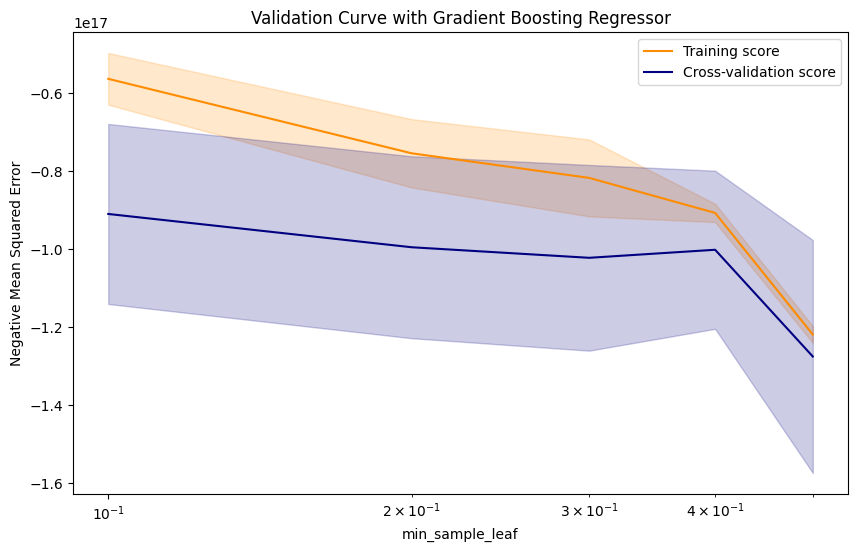

In [36]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))

plt.semilogx(param_range, 
             train_scores_mean, 
             label="Training score", 
             color="darkorange")
plt.semilogx(param_range, 
             test_scores_mean, 
             label="Cross-validation score", 
             color="navy")

plt.fill_between(param_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, 
                 color="darkorange")
plt.fill_between(param_range, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.2, 
                 color="navy")

plt.xlabel("min_sample_leaf")
plt.ylabel("Negative Mean Squared Error")
plt.title("Validation Curve with Gradient Boosting Regressor")
plt.legend(loc="best")
plt.show()

## RandomizedSearchCV

In [66]:
param_distributions = {
    'n_estimators': list(range(20, 50, 1)),
    'max_depth': [1, 2],
    'min_samples_split': [0.7],
    'min_samples_leaf': np.linspace(0.1, 0.2)
}

random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(),
    param_distributions=param_distributions,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    verbose=10
)

random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score: {random_search.best_score_}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5; 1/50] START max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21
[CV 1/5; 1/50] END max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21;, score=-81278885750377888.000 total time=   0.0s
[CV 2/5; 1/50] START max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21
[CV 2/5; 1/50] END max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21;, score=-49080802629914216.000 total time=   0.0s
[CV 3/5; 1/50] START max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21
[CV 3/5; 1/50] END max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21;, score=-101723223621894144.000 total time=   0.0s
[CV 4/5; 1/50] START max_depth=2, min_samples_leaf=0.12040816326530612, min_samples_split=0.7, n_estimators=21
[CV 4/5; 1/50] E

## Model Developmet

In [67]:
GBR_new = GradientBoostingRegressor(max_depth=2, 
                                    min_samples_leaf=0.18571428571428572, 
                                    min_samples_split=0.7,
                                    n_estimators=36)

model = GBR_new.fit(X_train, y_train)

In [68]:
y_pred = GBR_new.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_pred, y_test)
print(f"RMSE:{rmse} and MSE:{mse}")

RMSE:466568372.4586636 and MSE:2.1768604617872624e+17


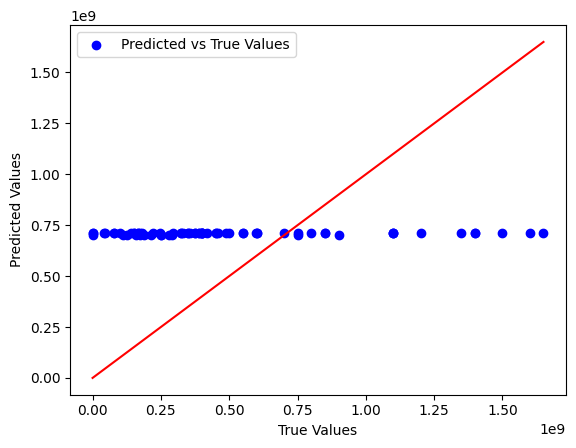

In [69]:
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
